In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np 
mpl.style.use('ggplot')

C:\Users\R2\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\R2\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\R2\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [5]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [6]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [7]:
df.index = df['Country']
df.drop(columns=['Country'], inplace=True)

In [8]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [9]:
years = np.arange(1980,2014).astype('str')
df_years = df[years].copy()
df_years

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
Country                                                                      
Afghanistan       16    39    39    47    71   340   496   741   828  1076   
Albania            1     0     0     0     0     0     1     2     2     3   
Algeria           80    67    71    69    63    44    69   132   242   434   
American Samoa     0     1     0     0     0     0     0     1     0     1   
Andorra            0     0     0     0     0     0     2     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        1191  1829  2162  3404  7583  5907  2741  1406  1411  3004   
Western Sahara     0     0     0     0     0     0     0     0     0     0   
Yemen              1     2     1     6     0    18     7    12     7    18   
Zambia            11    17    11     7    16     9    15    23    44    68   
Zimbabwe          72   114   102    44    32    29    43    68    99   187   

                ...  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Country         ...                                                         
Afghanistan     ...  2978  3436  3009  2652  2111  1746  1758  2203  2635   
Albania         ...  1450  1223   856   702   560   716   561   539   620   
Algeria         ...  3616  3626  4807  3623  4005  5393  4752  4325  3774   
American Samoa  ...     0     0     1     0     0     0     0     0     0   
Andorra         ...     0     0     1     1     0     0     0     0     1   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        ...  1816  1852  3153  2574  1784  2171  1942  1723  1731   
Western Sahara  ...     0     0     1     0     0     0     0     0     0   
Yemen           ...   124   161   140   122   133   128   211   160   174   
Zambia          ...    56    91    77    71    64    60   102    69    46   
Zimbabwe        ...  1450   615   454   663   611   508   494   434   437   

                2013  
Country               
Afghanistan     2004  
Albania          603  
Algeria         4331  
American Samoa     0  
Andorra            1  
...              ...  
Viet Nam        2112  
Western Sahara     0  
Yemen            217  
Zambia            59  
Zimbabwe         407  

[195 rows x 34 columns]

In [10]:
df_years['Total'] = df_years.sum(axis=1)
df_years

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
Country                                                                      
Afghanistan       16    39    39    47    71   340   496   741   828  1076   
Albania            1     0     0     0     0     0     1     2     2     3   
Algeria           80    67    71    69    63    44    69   132   242   434   
American Samoa     0     1     0     0     0     0     0     1     0     1   
Andorra            0     0     0     0     0     0     2     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        1191  1829  2162  3404  7583  5907  2741  1406  1411  3004   
Western Sahara     0     0     0     0     0     0     0     0     0     0   
Yemen              1     2     1     6     0    18     7    12     7    18   
Zambia            11    17    11     7    16     9    15    23    44    68   
Zimbabwe          72   114   102    44    32    29    43    68    99   187   

                ...  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Country         ...                                                         
Afghanistan     ...  3436  3009  2652  2111  1746  1758  2203  2635  2004   
Albania         ...  1223   856   702   560   716   561   539   620   603   
Algeria         ...  3626  4807  3623  4005  5393  4752  4325  3774  4331   
American Samoa  ...     0     1     0     0     0     0     0     0     0   
Andorra         ...     0     1     1     0     0     0     0     1     1   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        ...  1852  3153  2574  1784  2171  1942  1723  1731  2112   
Western Sahara  ...     0     1     0     0     0     0     0     0     0   
Yemen           ...   161   140   122   133   128   211   160   174   217   
Zambia          ...    91    77    71    64    60   102    69    46    59   
Zimbabwe        ...   615   454   663   611   508   494   434   437   407   

                Total  
Country                
Afghanistan     58639  
Albania         15699  
Algeria         69439  
American Samoa      6  
Andorra            15  
...               ...  
Viet Nam        97146  
Western Sahara      2  
Yemen            2985  
Zambia           1677  
Zimbabwe         8598  

[195 rows x 35 columns]

In [11]:
top5 = df_years.sort_values(by='Total', ascending=False)[:5]
top5.drop(columns=['Total'], inplace=True)
top5

1980   1981   1982  \
Country                                                                   
India                                                8880   8670   8147   
China                                                5123   6682   3308   
United Kingdom of Great Britain and Northern Ir...  22045  24796  20620   
Philippines                                          6051   5921   5249   
Pakistan                                              978    972   1201   

                                                     1983   1984  1985  1986  \
Country                                                                        
India                                                7338   5704  4211  7150   
China                                                1863   1527  1816  1960   
United Kingdom of Great Britain and Northern Ir...  10015  10170  9564  9470   
Philippines                                          4562   3801  3150  4166   
Pakistan                                              900    668   514   691   

                                                     1987   1988   1989  ...  \
Country                                                                  ...   
India                                               10189  11522  10343  ...   
China                                                2643   2758   4323  ...   
United Kingdom of Great Britain and Northern Ir...  21337  27359  23795  ...   
Philippines                                          7360   8639  11865  ...   
Pakistan                                             1072   1334   2261  ...   

                                                     2004   2005   2006  \
Country                                                                   
India                                               28235  36210  33848   
China                                               36619  42584  33518   
United Kingdom of Great Britain and Northern Ir...   7533   7258   7140   
Philippines                                         14004  18139  18400   
Pakistan                                            13399  14314  13127   

                                                     2007   2008   2009  \
Country                                                                   
India                                               28742  28261  29456   
China                                               27642  30037  29622   
United Kingdom of Great Britain and Northern Ir...   8216   8979   8876   
Philippines                                         19837  24887  28573   
Pakistan                                            10124   8994   7217   

                                                     2010   2011   2012   2013  
Country                                                                         
India                                               34235  27509  30933  33087  
China                                               30391  28502  33024  34129  
United Kingdom of Great Britain and Northern Ir...   8724   6204   6195   5827  
Philippines                                         38617  36765  34315  29544  
Pakistan                                             6811   7468  11227  12603  

[5 rows x 34 columns]

<AxesSubplot:>

<Figure size 1000x1000 with 0 Axes>

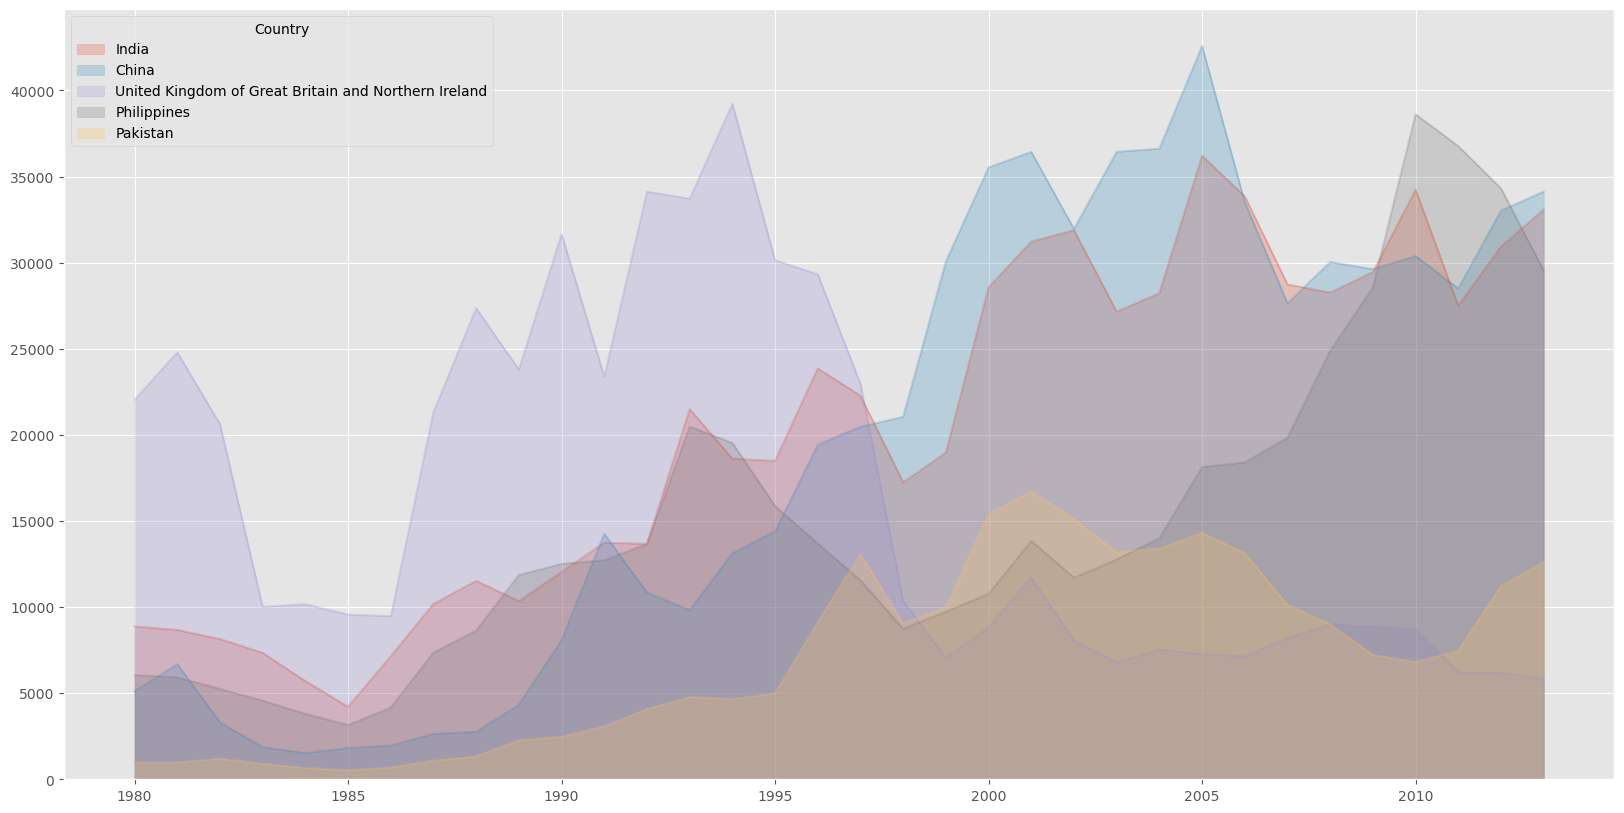

In [12]:
plt.figure(figsize=(10,10))
top5.T.plot(kind='area',
           stacked=False,
            alpha=0.25,
           figsize=(20,10))

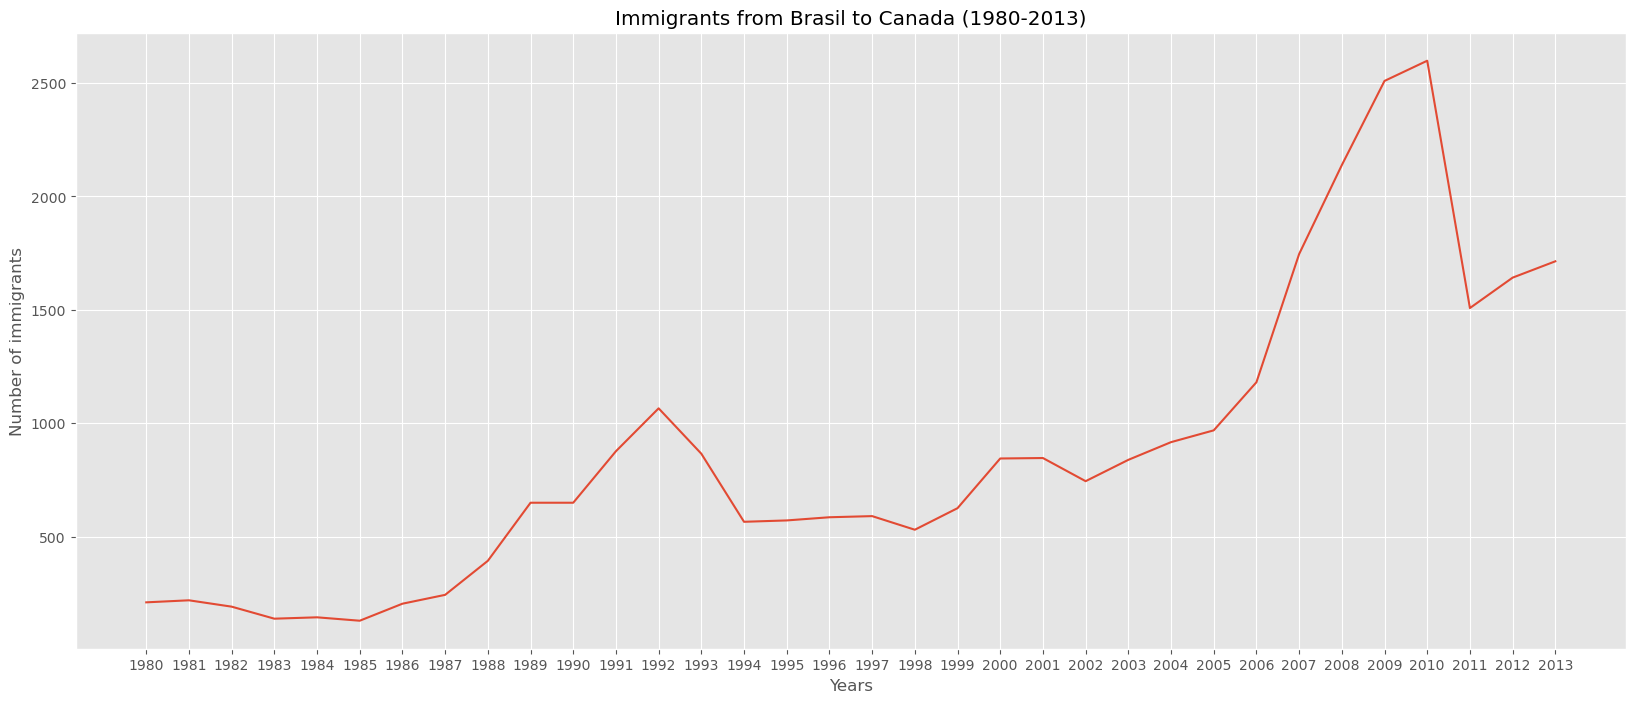

In [13]:
plt.figure(figsize=(20,8))
plt.plot(df_years.drop(columns=['Total']).loc['Brazil']);
plt.title('Immigrants from Brasil to Canada (1980-2013)');
plt.ylabel('Number of immigrants');
plt.xlabel('Years');

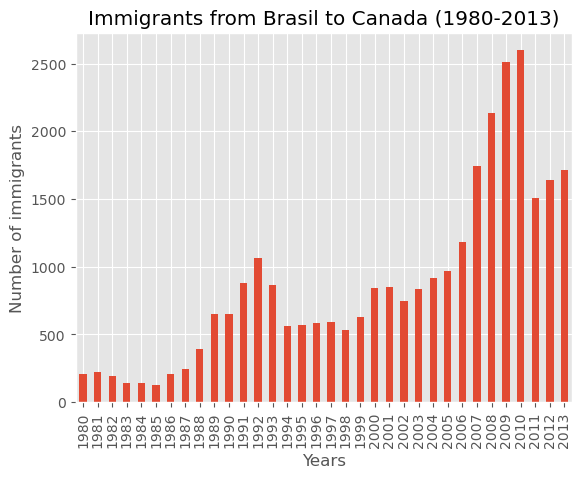

In [14]:
df_years.drop(columns=['Total']).loc['Brazil'].plot(kind='bar')
plt.title('Immigrants from Brasil to Canada (1980-2013)');
plt.ylabel('Number of immigrants');
plt.xlabel('Years');

<AxesSubplot:>

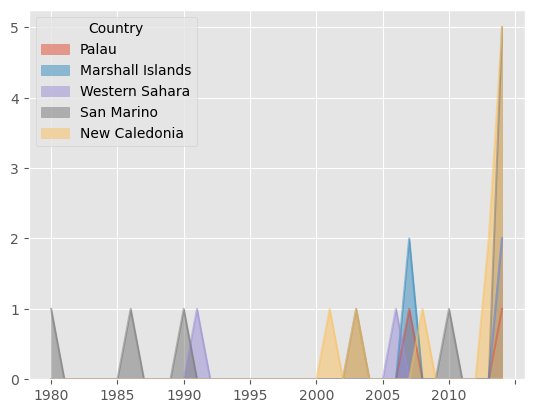

In [15]:
df_years.sort_values(by='Total')[:5].T.plot(kind='area',
                                           stacked=False)

In [16]:
df_iceland = df_years.loc[['Iceland']].drop(columns=['Total'], axis=1)
df_iceland = df_iceland.T

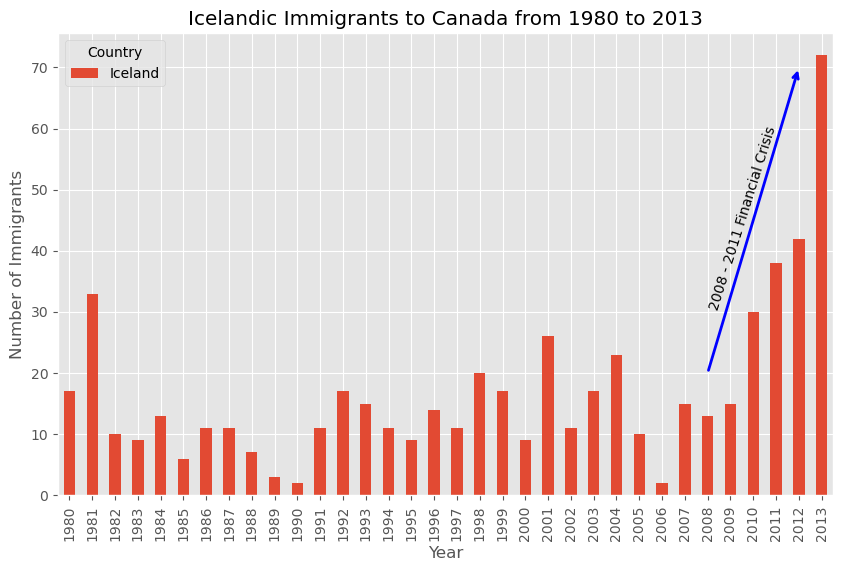

In [17]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [18]:
top15 = df_years.sort_values(by='Total', ascending=False)[:15]
top15 = top15['Total']

<AxesSubplot:ylabel='Country'>

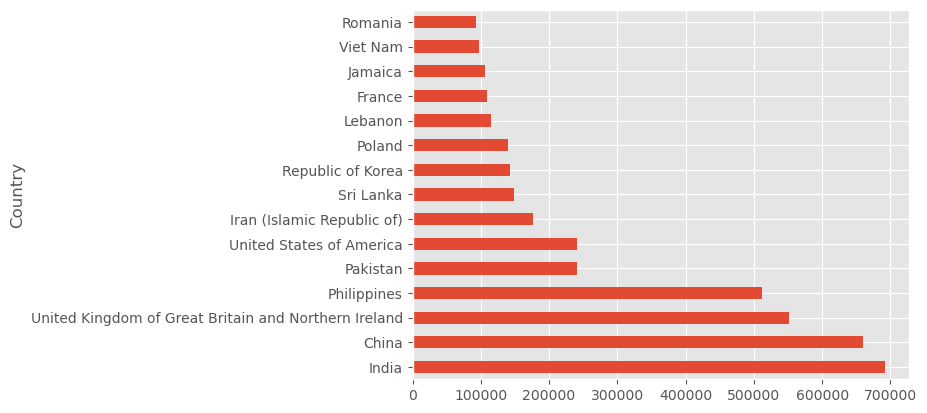

In [19]:
top15.plot(kind='barh')

In [20]:
continents = df.groupby('Continent').sum()
continents['Total'] = continents.sum(axis=1)
continents = continents.sort_values(['Total'], ascending=False)
continents

1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Africa                            3951   4363   3819   2671   2639   2650   
Northern America                  9378  10030   9074   7100   6661   6543   
Oceania                           1942   1839   1675   1018    878    920   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Africa                            3782   7494   7552   9894  ...   27523   
Northern America                  7074   7705   6469   6790  ...    8394   
Oceania                            904   1200   1181   1539  ...    1585   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Africa                            29188   28284   29890   34534   40892   
Northern America                   9613    9463   10190    8995    8142   
Oceania                            1473    1693    1834    1860    1834   

                                   2011    2012    2013    Total  
Continent                                                         
Asia                             146894  152218  155075  3317794  
Europe                            26778   29177   28691  1410947  
Latin America and the Caribbean   27856   27173   24950   765148  
Africa                            35441   38083   38543   618948  
Northern America                   7677    7892    8503   241142  
Oceania                            1548    1679    1775    55174  

[6 rows x 35 columns]

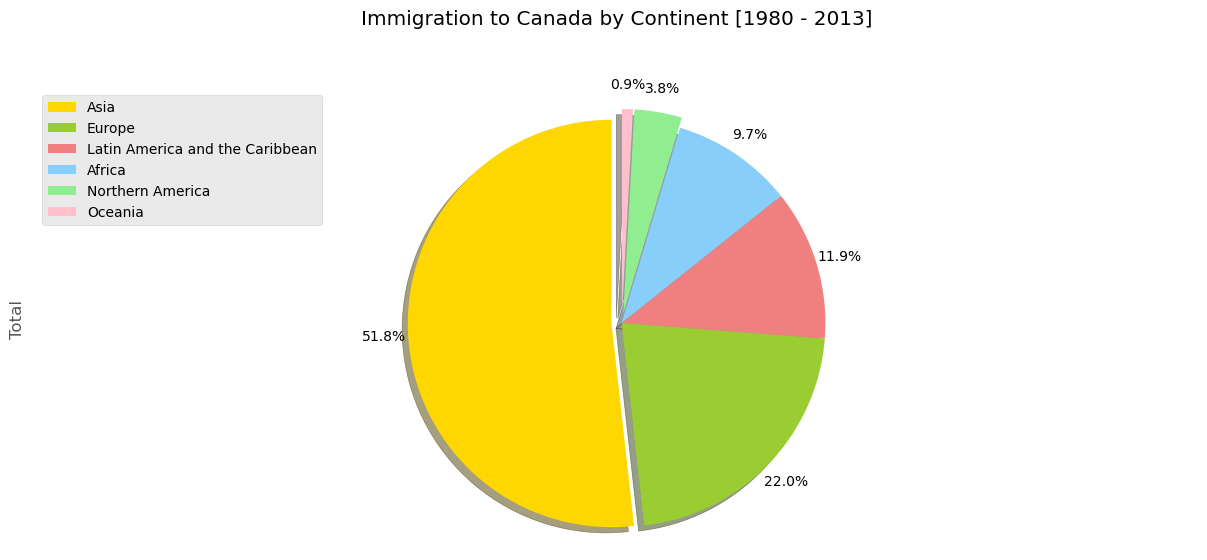

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.05, 0, 0, 0, 0.05, 0.05]

continents['Total'].plot(kind='pie',
                         figsize=(15, 6),
                        shadow=True,
                         autopct='%1.1f%%',
                        startangle=90,
                        labels=None,
                        colors = colors_list,
                        explode = explode_list,
                        pctdistance=1.12 # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        )

plt.title('Immigration to Canada by Continent [1980 - 2013]',y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=continents.index, loc='upper left') 
plt.show()

<AxesSubplot:>

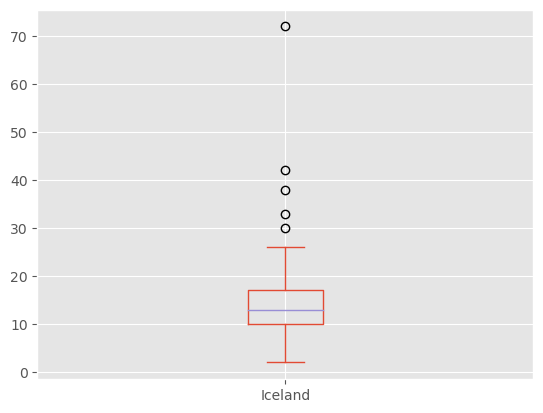

In [22]:
df_iceland.plot(kind='box')

In [23]:
df_total = df_years.drop(columns=['Total']).T
df_total['Total_by_year'] = df_total.sum(axis=1)
df_total = df_total[['Total_by_year']]
df_total.rename_axis('Year', axis='columns', inplace=True)
df_total.index = list(map(int,range(1980,2014)))
df_total.head()

Year  Total_by_year
1980          99137
1981         110563
1982         104271
1983          75550
1984          73417

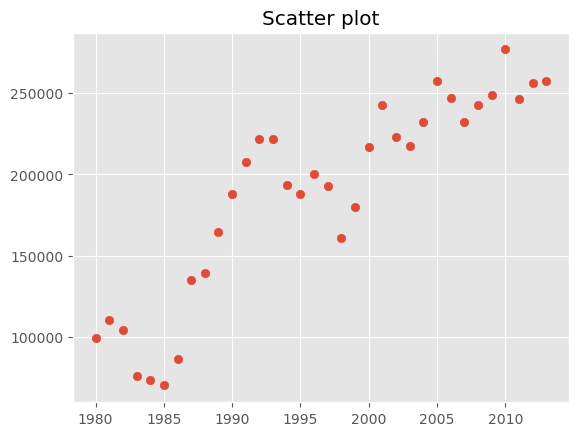

In [24]:
plt.scatter(x=df_total.index, y=df_total.Total_by_year)
plt.title('Scatter plot');

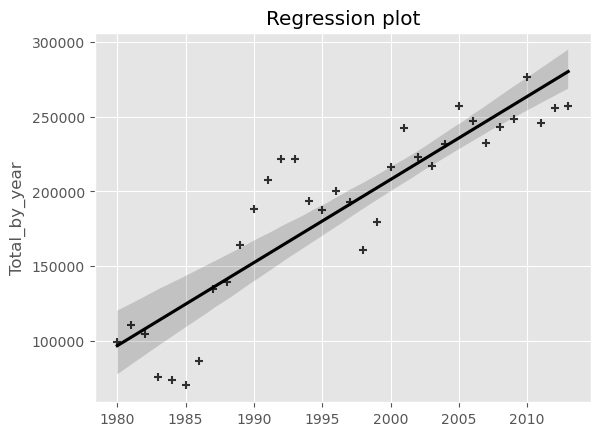

In [25]:
sns.regplot(x=df_total.index, y=df_total.Total_by_year, color ='k', marker='+')
plt.title('Regression plot');

# Waffle chart

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [26]:
df_waffle = df_years.loc[['Denmark','Norway','Sweden']]
df_waffle

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2005  2006  2007  2008  2009  2010  2011  2012  2013  Total  
Country                                                               
Denmark    62   101    97   108    81    92    93    94    81   3901  
Norway     57    53    73    66    75    46    49    53    59   2327  
Sweden    205   139   193   165   167   159   134   140   140   5866  

[3 rows x 35 columns]

In [27]:
total_values = df_waffle.Total.sum()
category_proportions = df_waffle['Total'] / total_values

pd.DataFrame({"Category Proportion": category_proportions})

Category Proportion
Country                     
Denmark             0.322557
Norway              0.192409
Sweden              0.485034

**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [28]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [29]:
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

Number of tiles
Country                 
Denmark              129
Norway                77
Sweden               194

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [30]:
waffle_chart = np.zeros((height, width), dtype = np.uint)

category_index=0
tile_index = 0

for col in range(width):
    for row in range(height):
        
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[:category_index]):
            category_index += 1
        
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


**Step 5.** Map the `waffle` chart matrix into a visual.

<Figure size 640x480 with 0 Axes>

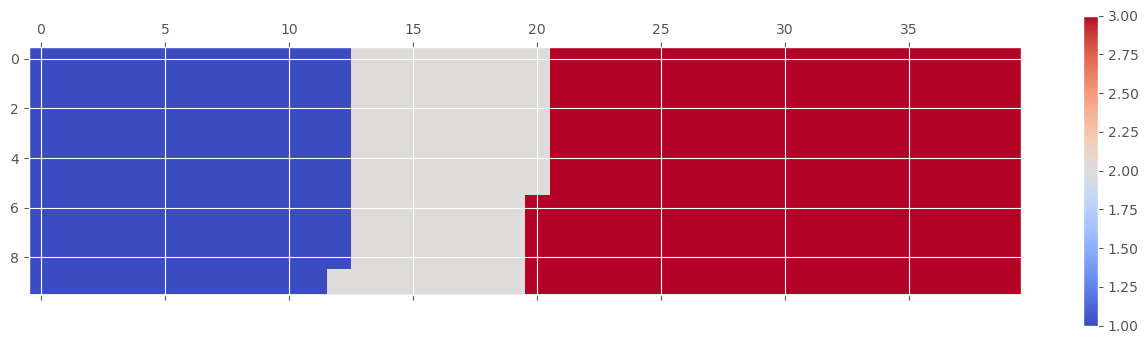

In [31]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.

<Figure size 640x480 with 0 Axes>

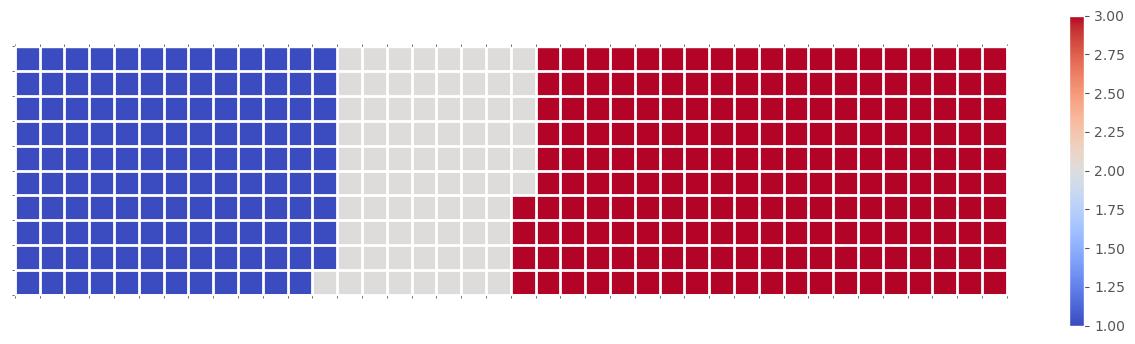

In [32]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
import matplotlib.patches as mpatches
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_waffle.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

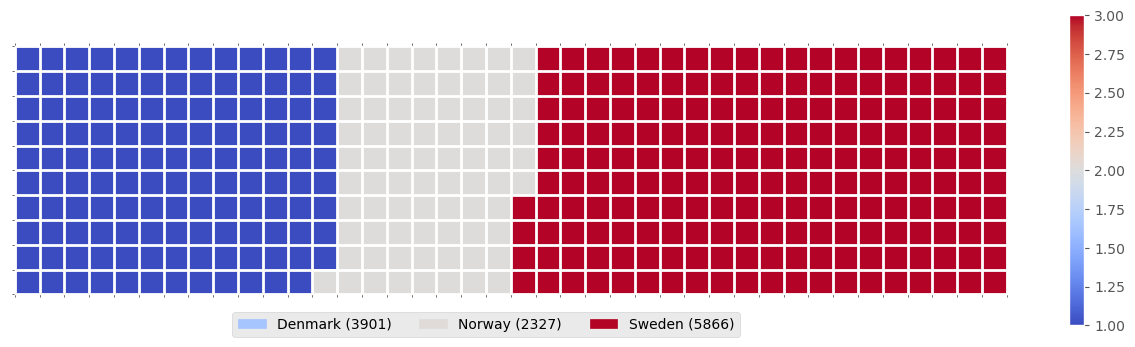

In [34]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_waffle.index.values # categories
values = df_waffle['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

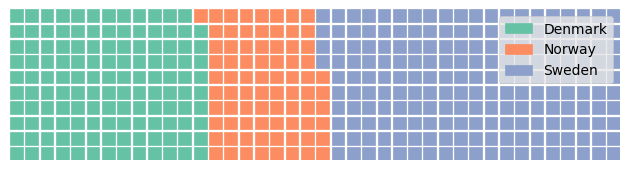

In [35]:
from pywaffle import Waffle
fig = plt.figure( 
    FigureClass = Waffle, 
    values = df_waffle['Total'], 
    labels = list(df_waffle.index.values),
    rows = 10, columns = 40
) 


# Folium

In [36]:
import folium

canada_map = folium.Map(location = [56.130, -106.35],
                      zoom_start=5,
                      #tiles='Mapbox Bright',
                      )

ontario = folium.map.FeatureGroup()
ontario.add_child(folium.features.CircleMarker([51.25,-85.32],
                                              radius =5, 
                                               color='red',
                                              fill_color='Red')).add_to(canada_map)
#canada_map.add_child(ontario)

folium.Marker([51.25,-85.32],
             popup='Ontario').add_to(canada_map)

canada_map

In [37]:
df_incidents =  pd.read_csv('Police.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [38]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [39]:
df_incidents.shape

(150500, 13)

In [40]:
df100 = df_incidents[:100]

In [41]:
san_fran = folium.Map(location=[37.77, -122.42],
                     zoom_start=13)

#for lat, log, cat in zip(df100.X, df100.Y, df100.Category):
#    foilum.features.

san_fran

In [42]:
incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df100.Y, df100.X, df100.Category):
    incidents.add_child(folium.features.CircleMarker(location= [lat, lng],
                                                radius=5,
                                                color='red',
                                                fill=True,
                                                fill_color='Red',
                                                popup = label)
                   ).add_to(san_fran)

san_fran

In [43]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(df100.Y, df100.X):
    incidents.add_child(folium.features.CircleMarker(location= [lat, lng],
                                                radius=5,
                                                color='red',
                                                fill=True,
                                                fill_color='Red'
                                                )).add_to(san_fran)

for lat, lng, label in zip(df100.Y, df100.X, df100.Category):
    folium.Marker(location= [lat, lng],
                 popup=label).add_to(san_fran)
    
san_fran

In [44]:
from folium import plugins
sanfran_map = folium.Map(location=[37.77, -122.42],
                     zoom_start=13)
incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df100.Y, df100.X, df100.Category):
    folium.Marker(location=[lat,lng],
                 icon=None,
                 popup=label).add_to(incidents)

sanfran_map

In [45]:
from urllib.request import urlopen
import json
with urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json') as response:
    world_geo = json.load(response)

print('GeoJSON file loaded!')

GeoJSON file loaded!


In [46]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

Data read into a pandas dataframe!
data dimensions: (195, 39)


C:\Users\R2\AppData\Local\Temp\ipykernel_12408\2395891116.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [47]:
threshold_scale= np.linspace(df_can['Total'].min(),
                            df_can['Total'].max()+1,
                            6, dtype=int)

world_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True,
    threshold_scale=threshold_scale
).add_to(world_map)

# display map
world_map

In [48]:
df_years

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
Country                                                                      
Afghanistan       16    39    39    47    71   340   496   741   828  1076   
Albania            1     0     0     0     0     0     1     2     2     3   
Algeria           80    67    71    69    63    44    69   132   242   434   
American Samoa     0     1     0     0     0     0     0     1     0     1   
Andorra            0     0     0     0     0     0     2     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        1191  1829  2162  3404  7583  5907  2741  1406  1411  3004   
Western Sahara     0     0     0     0     0     0     0     0     0     0   
Yemen              1     2     1     6     0    18     7    12     7    18   
Zambia            11    17    11     7    16     9    15    23    44    68   
Zimbabwe          72   114   102    44    32    29    43    68    99   187   

                ...  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Country         ...                                                         
Afghanistan     ...  3436  3009  2652  2111  1746  1758  2203  2635  2004   
Albania         ...  1223   856   702   560   716   561   539   620   603   
Algeria         ...  3626  4807  3623  4005  5393  4752  4325  3774  4331   
American Samoa  ...     0     1     0     0     0     0     0     0     0   
Andorra         ...     0     1     1     0     0     0     0     1     1   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam        ...  1852  3153  2574  1784  2171  1942  1723  1731  2112   
Western Sahara  ...     0     1     0     0     0     0     0     0     0   
Yemen           ...   161   140   122   133   128   211   160   174   217   
Zambia          ...    91    77    71    64    60   102    69    46    59   
Zimbabwe        ...   615   454   663   611   508   494   434   437   407   

                Total  
Country                
Afghanistan     58639  
Albania         15699  
Algeria         69439  
American Samoa      6  
Andorra            15  
...               ...  
Viet Nam        97146  
Western Sahara      2  
Yemen            2985  
Zambia           1677  
Zimbabwe         8598  

[195 rows x 35 columns]

# PLOTLY

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [51]:
airline_data =  pd.read_csv('airline_data.csv', encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [52]:
airline_data.head()

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0     1295781  1998        2      4           2          4  1998-04-02   
1     1125375  2013        2      5          13          1  2013-05-13   
2      118824  1993        3      9          25          6  1993-09-25   
3      634825  1994        4     11          12          6  1994-11-12   
4     1888125  2017        3      8          17          4  2017-08-17   

  Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline  \
0                AS                     19930                          AS   
1                EV                     20366                          EV   
2                UA                     19977                          UA   
3                HP                     19991                          HP   
4                UA                     19977                          UA   

   ... Div4WheelsOff  Div4TailNum  Div5Airport  Div5AirportID  \
0  ...           NaN          NaN          NaN            NaN   
1  ...           NaN          NaN          NaN            NaN   
2  ...           NaN          NaN          NaN            NaN   
3  ...           NaN          NaN          NaN            NaN   
4  ...           NaN          NaN          NaN            NaN   

   Div5AirportSeqID Div5WheelsOn Div5TotalGTime Div5LongestGTime  \
0               NaN          NaN            NaN              NaN   
1               NaN          NaN            NaN              NaN   
2               NaN          NaN            NaN              NaN   
3               NaN          NaN            NaN              NaN   
4               NaN          NaN            NaN              NaN   

   Div5WheelsOff Div5TailNum  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  

[5 rows x 110 columns]

In [53]:
airline_data.shape

(27000, 110)

In [54]:
for col in airline_data.columns:
    if airline_data[col].isnull().sum() == 27000:
        airline_data.drop(columns=[col], inplace=True)


In [55]:
airline_data.head()

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0     1295781  1998        2      4           2          4  1998-04-02   
1     1125375  2013        2      5          13          1  2013-05-13   
2      118824  1993        3      9          25          6  1993-09-25   
3      634825  1994        4     11          12          6  1994-11-12   
4     1888125  2017        3      8          17          4  2017-08-17   

  Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline  \
0                AS                     19930                          AS   
1                EV                     20366                          EV   
2                UA                     19977                          UA   
3                HP                     19991                          HP   
4                UA                     19977                          UA   

   ... DivArrDelay  DivDistance  Div1Airport  Div1AirportID  Div1AirportSeqID  \
0  ...         NaN          NaN          NaN            NaN               NaN   
1  ...         NaN          NaN          NaN            NaN               NaN   
2  ...         NaN          NaN          NaN            NaN               NaN   
3  ...         NaN          NaN          NaN            NaN               NaN   
4  ...         NaN          NaN          NaN            NaN               NaN   

  Div1WheelsOn Div1TotalGTime Div1LongestGTime  Div1WheelsOff Div1TailNum  
0          NaN            NaN              NaN            NaN         NaN  
1          NaN            NaN              NaN            NaN         NaN  
2          NaN            NaN              NaN            NaN         NaN  
3          NaN            NaN              NaN            NaN         NaN  
4          NaN            NaN              NaN            NaN         NaN  

[5 rows x 78 columns]

In [56]:
# 500 samples
data = airline_data.sample(n=500, random_state=42)
data.shape

(500, 78)

Theme: How departure time changes with respect to airport distance

<AxesSubplot:xlabel='Distance', ylabel='DepTime'>

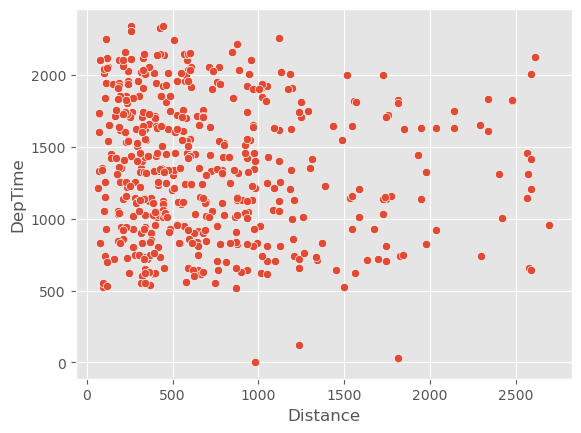

In [57]:
sns.scatterplot(x='Distance', y='DepTime', data= data)

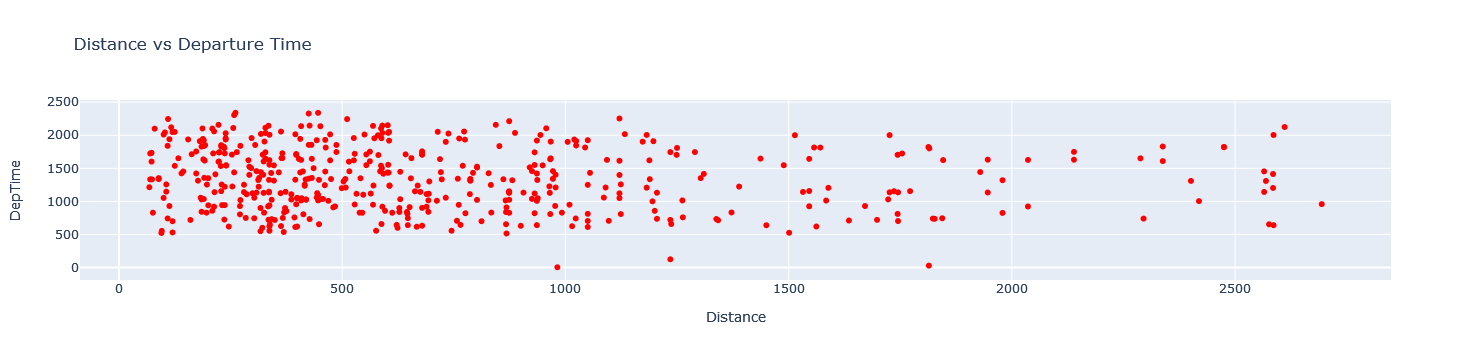

In [58]:
fig = go.Figure(data=go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
fig.show()

Theme: Extract average monthly delay time and see how it changes over the year

In [59]:
data_month_delay = data.groupby('Month')['ArrDelay'].mean().reset_index()

<AxesSubplot:xlabel='Month', ylabel='ArrDelay'>

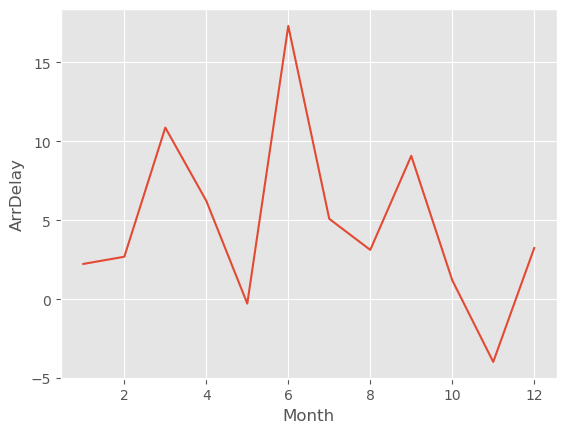

In [60]:
sns.lineplot(x= data_month_delay.Month, y=data_month_delay.ArrDelay)

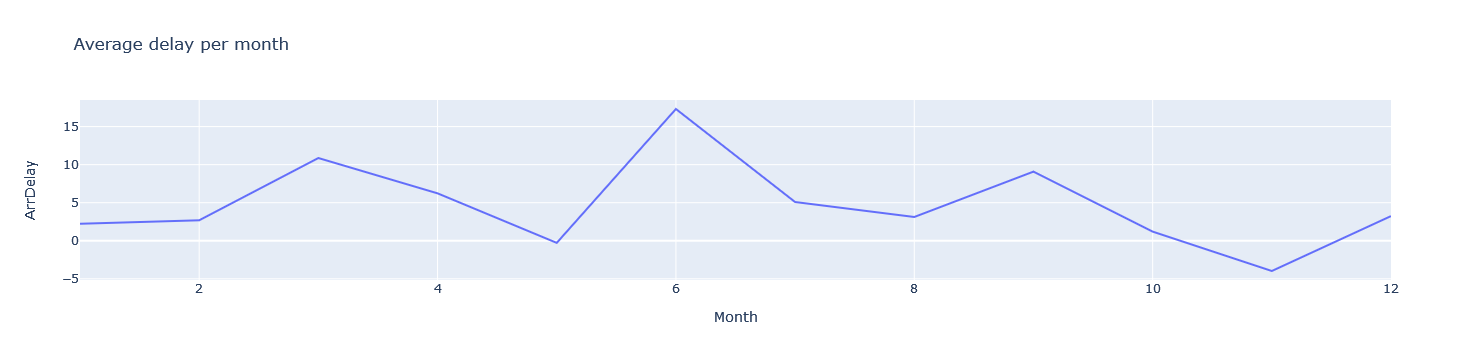

In [61]:
px.line(data_month_delay,x= 'Month', y='ArrDelay', title='Average delay per month')

Theme: Extract number of flights from a specific airline that goes to a destination

In [62]:
state_flight = data.groupby('DestState').Flights.count().sort_values(ascending=False).reset_index()

<AxesSubplot:xlabel='DestState', ylabel='Flights'>

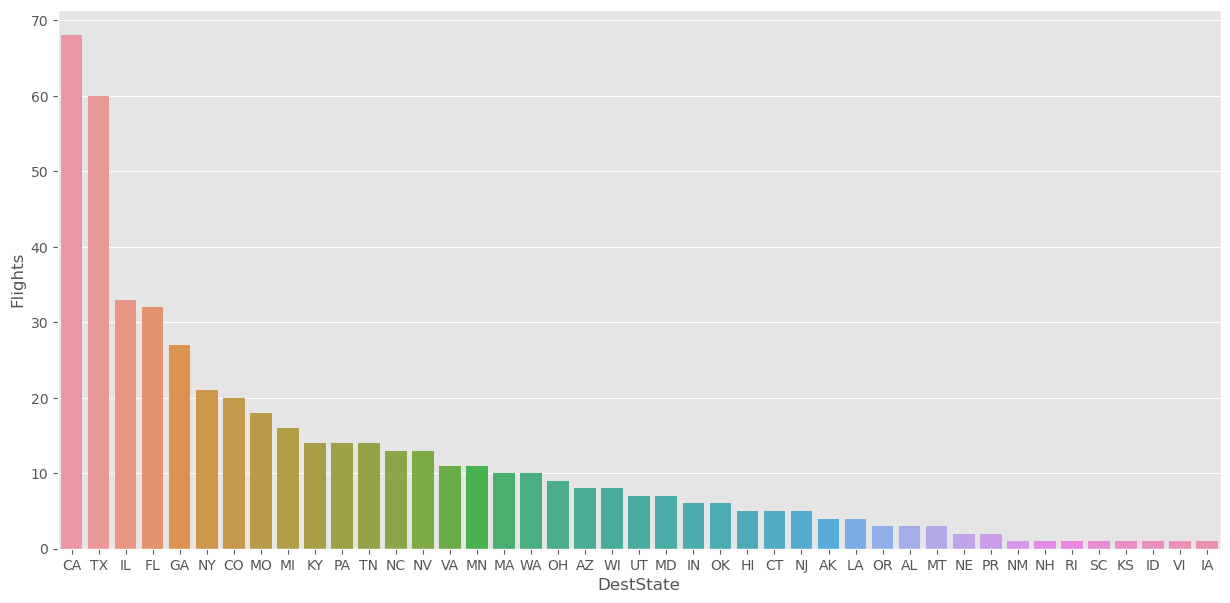

In [63]:
plt.figure(figsize=(15,7))
sns.barplot(x=state_flight.DestState, y=state_flight.Flights)

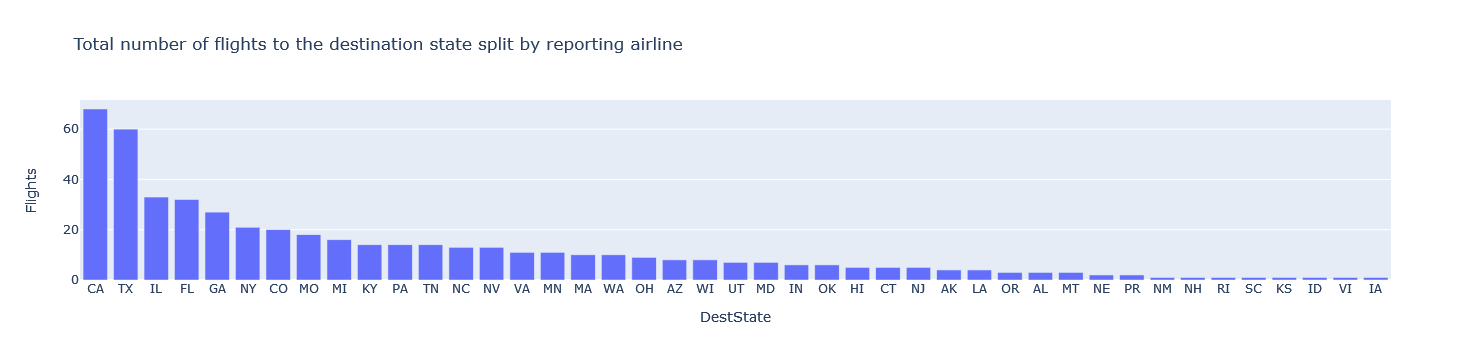

In [64]:
fig = px.bar(state_flight, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

Theme: Get number of flights as per reporting airline

In [65]:
flights_airline = airline_data.groupby('Reporting_Airline').Flights.count().reset_index()
flights_airline.head()

Reporting_Airline  Flights
0                9E      262
1                AA     3151
2                AS      710
3                B6      499
4                CO     1208

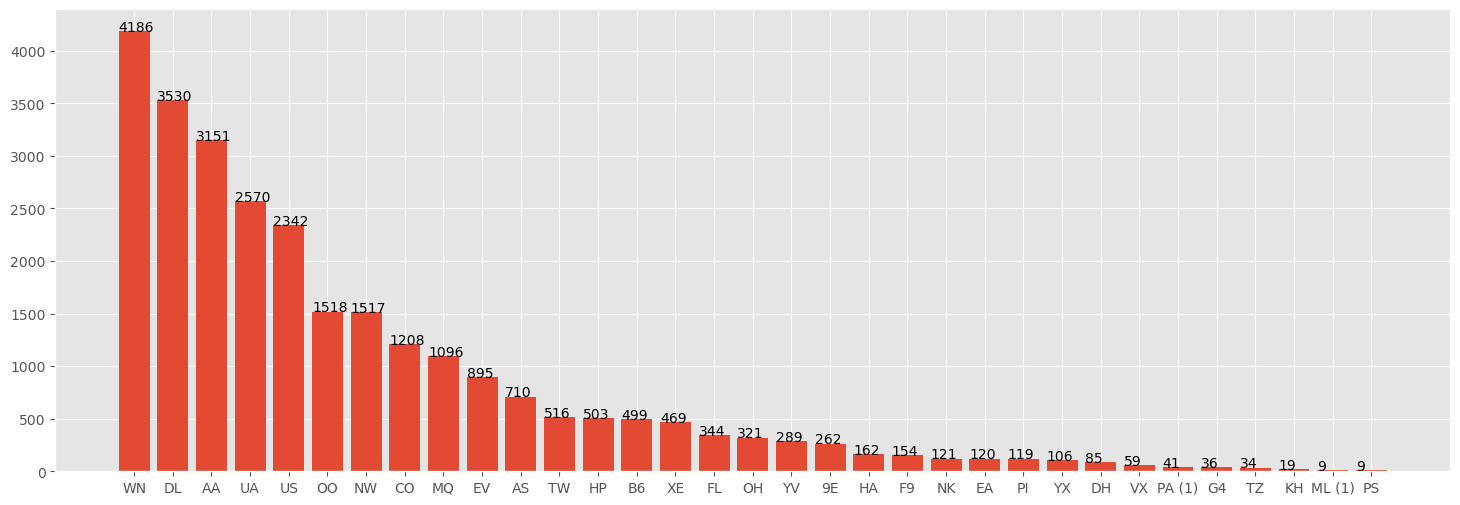

In [66]:
plt.figure(figsize=(18,6))
ax = plt.bar('Reporting_Airline','Flights', data= flights_airline.sort_values(by='Flights', ascending=False))

for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))

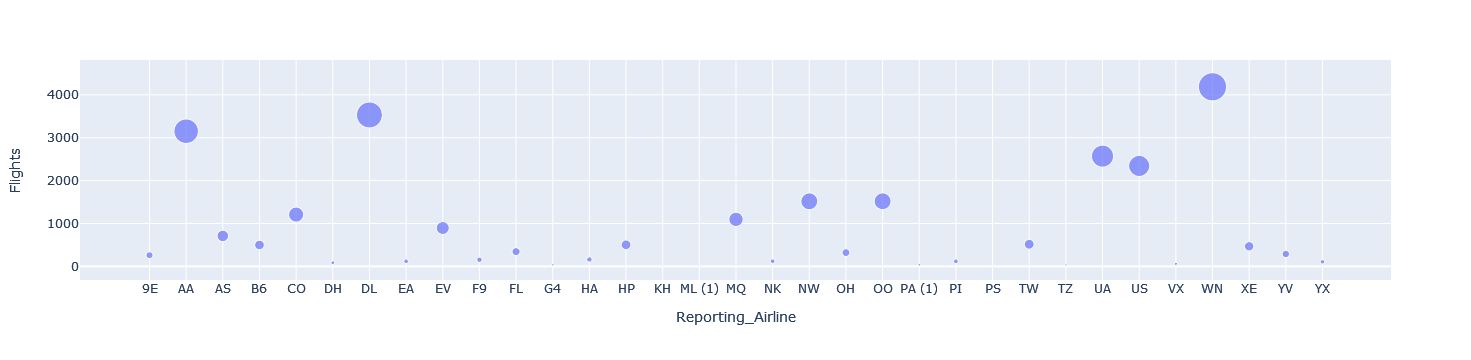

In [67]:
fig = px.scatter(flights_airline,x='Reporting_Airline', y='Flights', size="Flights")
fig.show()

Theme: Get distribution of arrival delay

In [68]:
data.ArrDelay.isnull().sum()

15

In [69]:
data.ArrDelay.fillna(0, inplace=True)

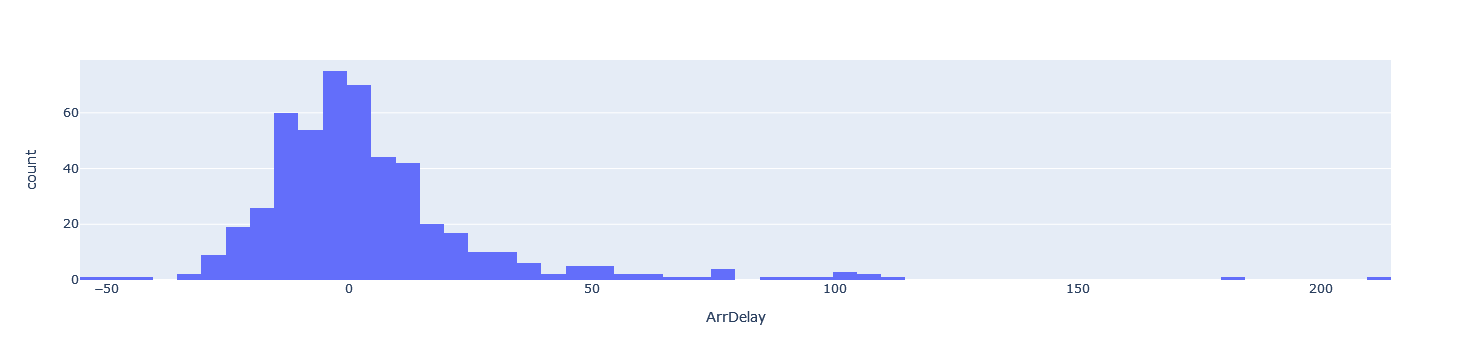

In [70]:
px.histogram(data, 'ArrDelay')

Theme: Proportion of distance group by month (month indicated by numbers)

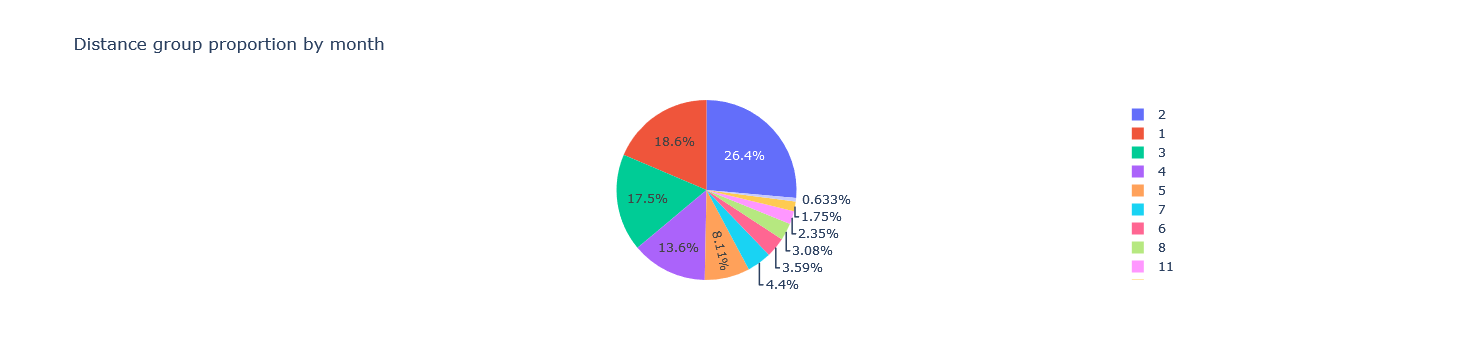

In [71]:
fig = px.pie(data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

Theme: Hierarchical view in othe order of month and destination state holding value of number of flights

In [72]:
data.groupby(['Month','DestStateName'])['Flights'].count().reset_index()

Month DestStateName  Flights
0        1       Arizona        1
1        1    California        7
2        1      Colorado        2
3        1   Connecticut        1
4        1       Florida        2
..     ...           ...      ...
243     12  Pennsylvania        1
244     12     Tennessee        1
245     12         Texas       10
246     12      Virginia        2
247     12    Washington        1

[248 rows x 3 columns]

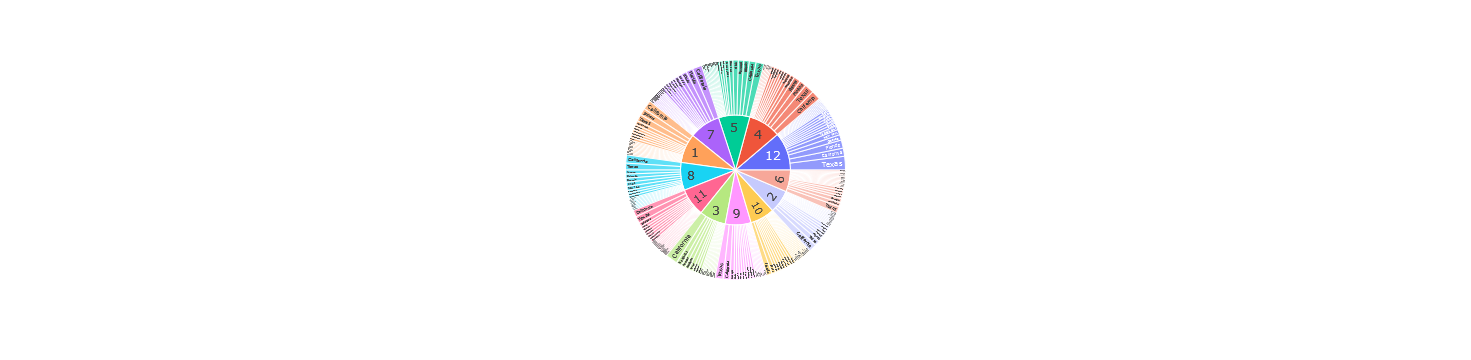

In [73]:
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights')
fig.show()

# DASH

In [74]:
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output, State

In [75]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('Airline Dashboard',
                                       style={'color': '#503D36',
                                             'textAlign': 'center',
                                             'font-size':40}),
                              html.P('Proportion of distance group (250 mile distance interval group) by flights',
                                    style={'textAlign':'center',
                                          'color':'#F57241'}),
                              dcc.Graph(figure=fig)])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


# DashBoard Test

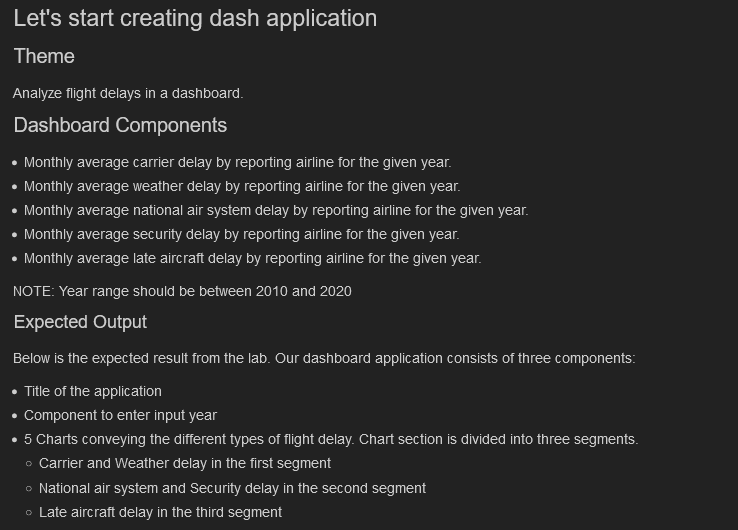

In [76]:
app = dash.Dash(__name__)
app.layout = html.Div(children=[ html.H1('Flight Delay Time Statistics', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'35px', 'font-size': 30}),], 
                                style={'font-size': 30}),
                                html.Br(),
                                html.Br(), 
                                # Segment 1
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 2
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 3
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                ])


def compute_info(airline_data, entered_year):
    
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    avg_car = df.groupby(by=['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(by=['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_nas = df.groupby(by=['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_security = df.groupby(by=['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(by=['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    
    return [avg_car, avg_weather, avg_nas, avg_security, avg_late]

@app.callback([Output(component_id='carrier-plot', component_property='figure'),
              Output(component_id='weather-plot', component_property='figure'),
              Output(component_id='nas-plot', component_property='figure'),
              Output(component_id='security-plot', component_property='figure'),
              Output(component_id='late-plot', component_property='figure')],
              Input(component_id='input-year', component_property='value'))

def get_graph(entered_year):
                          
    avg_car, avg_weather, avg_nas, avg_security, avg_late = compute_info(airline_data, entered_year)
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrier delay time by airline company')
    weather_fig  = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average carrier delay time by airline company')
    nas_fig  = px.line(avg_nas, x='Month', y='NASDelay', color='Reporting_Airline', title='Average carrier delay time by airline company')          
    sec_fig  = px.line(avg_security, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average carrier delay time by airline company')
    late_fig  = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average carrier delay time by airline company') 
    
    return [carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]   
              
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


# Dashboard test

In [78]:
df = pd.read_csv('automobileEDA.csv')
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

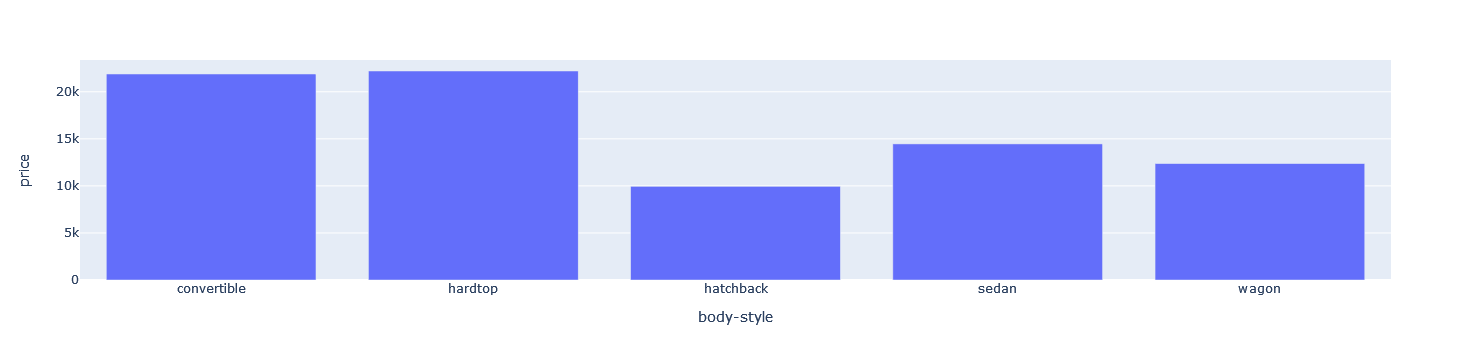

In [79]:
car_body_style = df.groupby(['body-style']).price.mean().reset_index()
bar_chart = px.bar(car_body_style, x='body-style', y='price') 
bar_chart

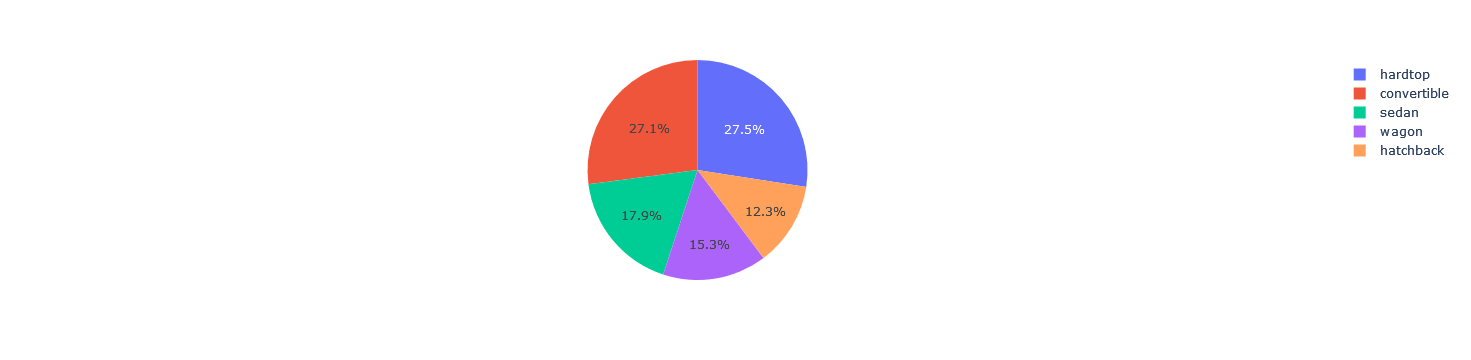

In [80]:
pie_chart = px.pie(car_body_style, values='price', names='body-style')
pie_chart

In [81]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('Car Automobile Components', style={'color':'#800000','textAlign':'center'}),
    
    html.Div([ 
        html.Div([ 
            html.H2('Drive Wheels Type: ', style={'margin-right':'2em'}),
            
            dcc.Dropdown(id='demo-dropdown',
                         options=[{'label':'Rear Wheel Drive', 'value':'rwd'},
                                 {'label':'Front Wheel Drive', 'value':'fwd'},
                                 {'label':'Four Wheel Drive', 'value':'4wd'}],
                         placeholder='Select the drive-wheels type',
                         style={'width':'80%'})
            
        ],style={'display':'flex'}),
        
       html.Div([
           html.Div([], id='plot1'),
           html.Div([], id='plot2')
       ], style={'display':'flex'})
        
        ])
])

@app.callback([Output(component_id='plot1', component_property='children'),
              Output(component_id='plot2', component_property='children')],
             Input(component_id='demo-dropdown', component_property='value'),
             State('plot1','children')
             )

def imprime_grafico(value, children):
    
    filtered_df = df[df['drive-wheels']==value].groupby(['drive-wheels','body-style']).price.mean().reset_index()
    
    fig1 = px.pie(filtered_df, values='price', names='body-style')
    fig2 = px.bar(filtered_df, x='body-style', y='price') 

    return [dcc.Graph(figure=fig1),
           dcc.Graph(figure=fig2)]
    
    
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


# Dashboard Final TEST

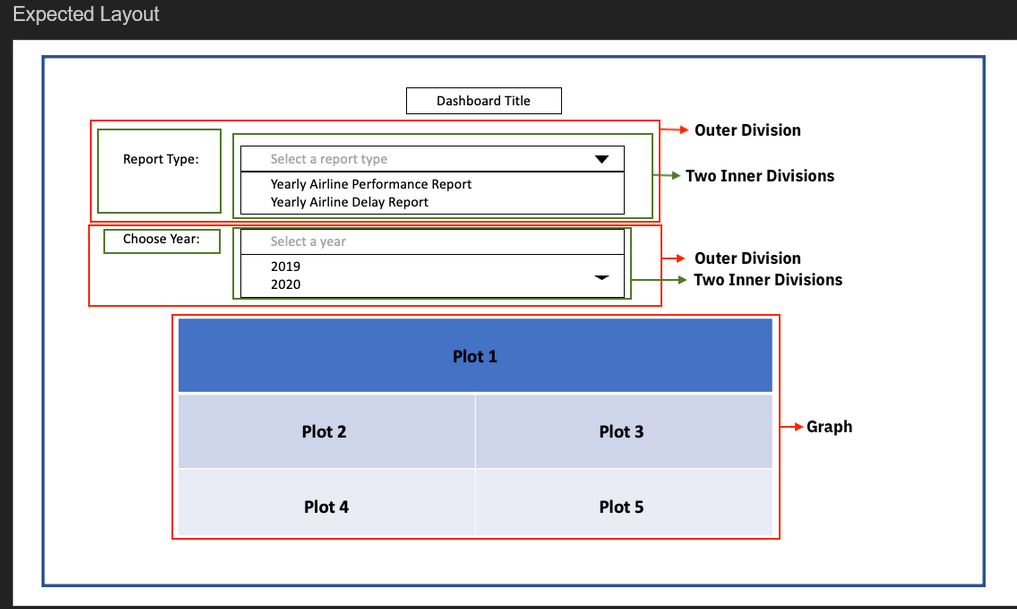

In [82]:
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
mpl.style.use('ggplot')
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output, State

airline_data =  pd.read_csv('airline_data.csv', encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

app = dash.Dash(__name__)

app.config.suppress_callback_exceptions = True

app.layout = html.Div(children= [html.Div([
                                 
                                 html.H1('US Domestic Airline Flights Performance', style={'color':'#503D36', 'textAlign':'center', 'fontsize':'24'}),
                                            ]),
    
                                 html.Div([
                                     "Report Type: ", dcc.Dropdown(id='input-type',
                                         options=[{'label':'Yearly Airline Performance Report', 'value':'OPT1'},
                                                                            {'label':'Yearly Airline Delay Report', 'value':'OPT2'}], placeholder='Select a report type',style={'width':'80%',
                                                                            'fontsize':'20px','textAlign':'center','padding':'3px'})
                                 ], style={'display':'flex'}),
                                 
                                 html.Div([
                                     "Choose Year", dcc.Dropdown(id='input-year',options=[{'label':i,'value':i} for i in range(2005,2021)],
                                                                placeholder='Select year',style={'width':'80%','fontsize':'20px','textAlign':'center','padding':'3px'})
                                 ], style={'display':'flex'}),
                                 
                                 html.Div([ ], id='plot1'),
                                 
                                 html.Div([
                                     html.Div([ ], id='plot2'),
                                     html.Div([ ], id='plot3')
                                 ], style={'display':'flex'}),
                                 
                                 html.Div([
                                     html.Div([ ], id='plot4'),
                                     html.Div([ ], id='plot5')
                                 ], style={'display':'flex'})
                                ])

def compute_data1(airline_data,  entered_year):
    
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    cancellation = df.groupby(['Month','CancellationCode']).Flights.count().reset_index()
    fly_time = df.groupby(['Month','Reporting_Airline']).AirTime.mean().reset_index()
    diverted_landing = df.query('DivAirportLandings > 0').groupby(['Month','Reporting_Airline']).DivAirportLandings.count().reset_index()
    origin = df.groupby('OriginState').Flights.count().reset_index()
    destination = df.groupby(['Reporting_Airline','DestState']).Flights.count().reset_index()
    
    return [cancellation, fly_time, diverted_landing, origin, destination]

def compute_data2(airline_data, entered_year):
    
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    avg_car = df.groupby(by=['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(by=['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_nas = df.groupby(by=['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_security = df.groupby(by=['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(by=['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    
    return [avg_car, avg_weather, avg_nas, avg_security, avg_late]

@app.callback([Output(component_id='plot1', component_property='children'),
              Output(component_id='plot2', component_property='children'),
              Output(component_id='plot3', component_property='children'),
              Output(component_id='plot4', component_property='children'),
              Output(component_id='plot5', component_property='children')],
              
             [Input(component_id='input-type', component_property='value'),
             Input(component_id='input-year', component_property='value')],
              
             [State("plot1",'children'), State("plot2",'children'), State("plot3",'children'),
             State("plot4",'children'), State("plot5",'children')]
             )

def get_graph(report_type, entered_year, children1, children2, children3, children4, children5):
    
    if report_type == 'OPT1':
        
        cancellation, fly_time, diverted_landing, origin, destination = compute_data1(airline_data, entered_year)
        
        cancellation_fig = px.bar(cancellation, x='Month', y='Flights', color='CancellationCode', title='Number of flights under different cancellation categories per month')
        fly_time_fig = px.line(fly_time, x='Month', y='AirTime', color='Reporting_Airline', title='Average flight time by reporting airline per month')
        diverted_landing_fig = px.pie(diverted_landing, values='DivAirportLandings', names='Reporting_Airline', title='Percentage of diverted airport landings per reporting airline')
        
        origin_fig = px.choropleth(origin, 
                                    locations='OriginState', 
                                    color='Flights',  
                                    hover_data=['OriginState', 'Flights'], 
                                    locationmode = 'USA-states',
                                    color_continuous_scale='GnBu',
                                    range_color=[0, origin['Flights'].max()]) 
    
        origin_fig.update_layout(title_text = 'Number of flights flying from each state', 
                                 geo_scope='usa')

        destination_fig = px.treemap(destination, path=['DestState', 'Reporting_Airline'], 
                      values='Flights',
                      color='Flights',
                      color_continuous_scale='RdBu',
                      title='Number of flights flying to each state from each reporting airline'
                )
      
    
        return [dcc.Graph(figure= destination_fig), 
                dcc.Graph(figure= diverted_landing_fig),
               dcc.Graph(figure= origin_fig),
               dcc.Graph(figure= cancellation_fig),
               dcc.Graph(figure= fly_time_fig)
               ]

    if report_type == 'OPT2':
        avg_car, avg_weather, avg_nas, avg_security, avg_late = compute_data2(airline_data, entered_year)
        
        carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay',      color='Reporting_Airline', title='Average carrier delay time by airline company')
        weather_fig  = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time by airline company')
        nas_fig  = px.line(avg_nas, x='Month', y='NASDelay',             color='Reporting_Airline', title='Average NAS delay time by airline company')          
        sec_fig  = px.line(avg_security, x='Month', y='SecurityDelay',   color='Reporting_Airline', title='Average security delay time by airline company')
        late_fig  = px.line(avg_late, x='Month', y='LateAircraftDelay',  color='Reporting_Airline', title='Average late aircraft delay time by airline company') 
    
        return [dcc.Graph(figure=carrier_fig), 
                dcc.Graph(figure=weather_fig),
                dcc.Graph(figure=nas_fig),
                dcc.Graph(figure=sec_fig),
                dcc.Graph(figure=late_fig)]


if __name__ == '__main__':
    app.run_server(host="localhost")

Data downloaded and read into a dataframe!
Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:8050/ (Press CTRL+C to quit)


In [84]:
cancellation = airline_data.groupby(['Month','CancellationCode']).Flights.count().reset_index()
cancellation.head()

Month CancellationCode  Flights
0      1                A        6
1      1                B       22
2      1                C        4
3      2                A       11
4      2                B       19

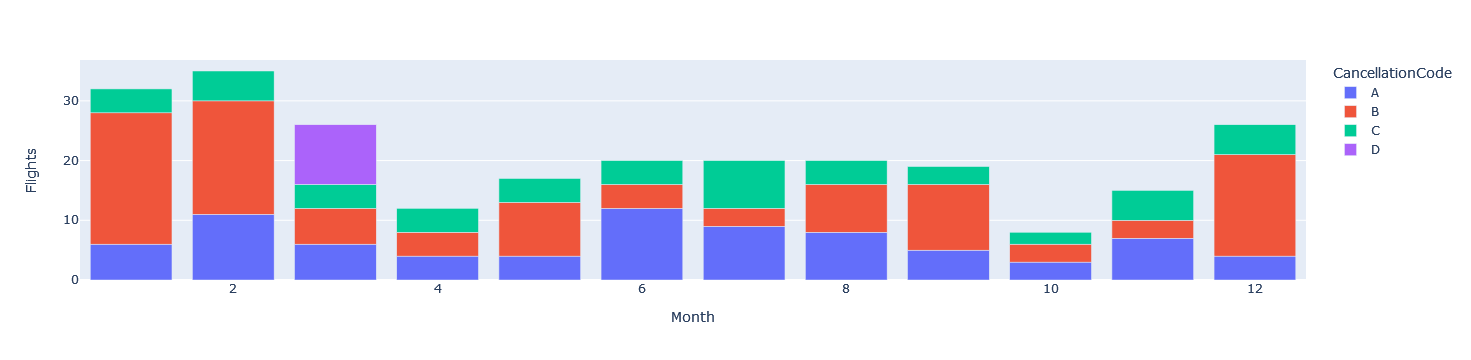

In [98]:
cancellation_bar = px.bar(cancellation, x='Month', y='Flights', color='CancellationCode')
cancellation_bar.show()

In [86]:
fly_time = airline_data.groupby(['Month','Reporting_Airline']).AirTime.mean().reset_index()
fly_time.head()

Month Reporting_Airline     AirTime
0      1                9E   64.545455
1      1                AA  137.628571
2      1                AS  130.142857
3      1                B6  163.951220
4      1                CO  122.945455

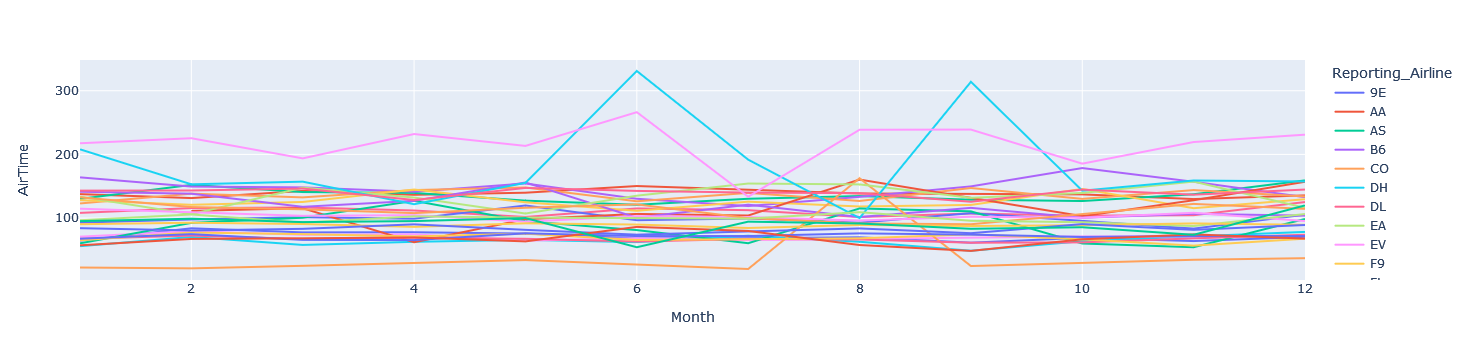

In [97]:
line = px.line(fly_time, x='Month', y='AirTime', color='Reporting_Airline')
line.show()

In [88]:
diverted_landing = airline_data.query('DivAirportLandings > 0').groupby(['Month','Reporting_Airline']).DivAirportLandings.count().reset_index()
diverted_landing.head()

Month Reporting_Airline  DivAirportLandings
0      1                G4                   1
1      1                OO                   1
2      1                YX                   1
3      3                CO                   1
4      3                NK                   1

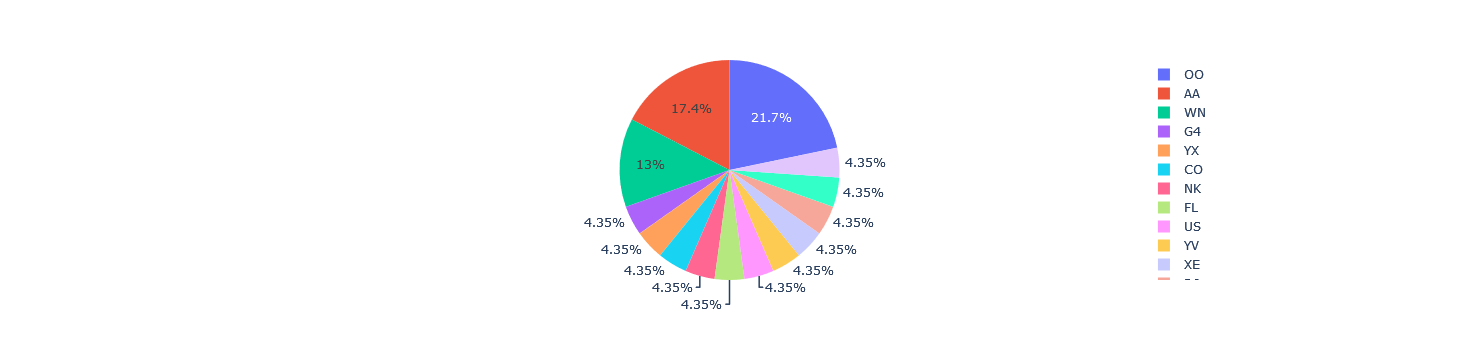

In [96]:
pie = px.pie(diverted_landing, values='DivAirportLandings', names='Reporting_Airline')
pie.show()

In [90]:
origin = airline_data.groupby('OriginState').Flights.count().reset_index()
origin.head()

OriginState  Flights
0          AK      176
1          AL      130
2          AR       98
3          AZ      862
4          CA     3286

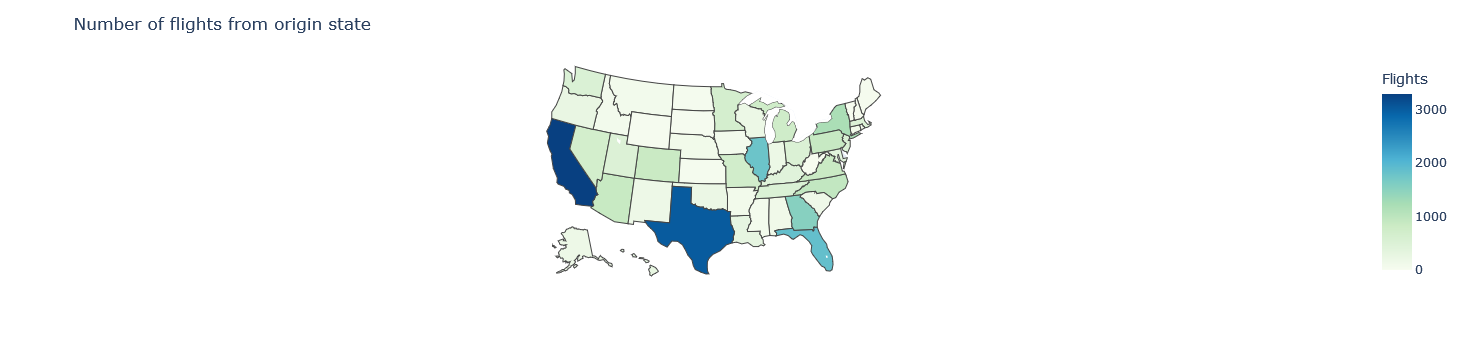

In [95]:
map_fig = px.choropleth(origin,  # Input data
        locations='OriginState', 
        color='Flights',  
        hover_data=['OriginState', 'Flights'], 
        locationmode = 'USA-states',
        color_continuous_scale='GnBu',
        range_color=[0, origin['Flights'].max()]) 

map_fig.update_layout(
        title_text = 'Number of flights from origin state', 
        geo_scope='usa') # Plot only the USA instead of globe

map_fig.show()

In [92]:
destination = airline_data.groupby(['Reporting_Airline','DestState']).Flights.count().reset_index()
destination.head()

Reporting_Airline DestState  Flights
0                9E        AL        5
1                9E        AR        2
2                9E        CT        3
3                9E        FL        4
4                9E        GA       23

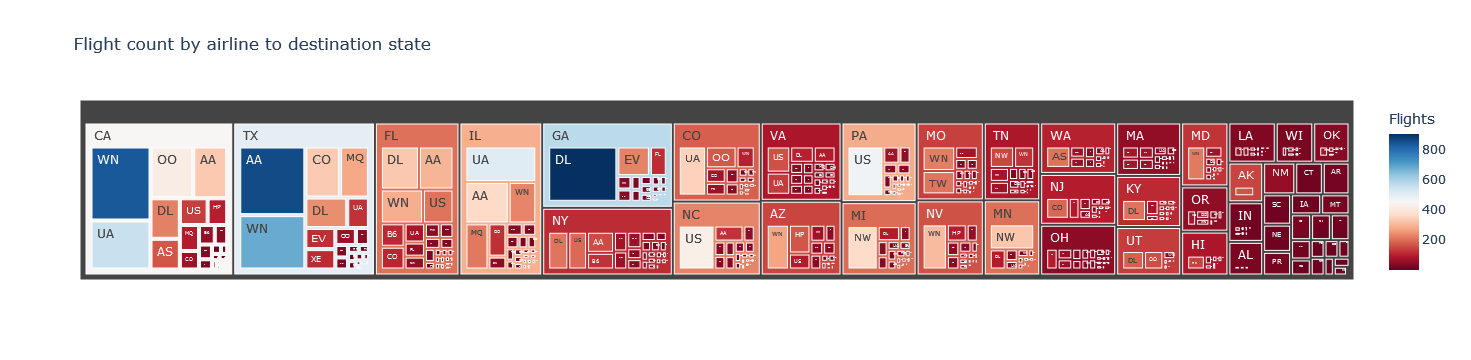

In [94]:
tree_fig = px.treemap(destination, path=['DestState', 'Reporting_Airline'], 
                      values='Flights',
                      color='Flights',
                      color_continuous_scale='RdBu',
                      title='Flight count by airline to destination state'
                )
tree_fig.show()